In [1]:
#import important libaries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the train, test and sample_submission

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
sample_sub = pd.read_csv('sample_submission.csv')

In [3]:
#Check the head of the train set
df_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [4]:
#Check the info of train set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [5]:
#Check the description of the numerical features in the train set
df_train.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [6]:
# Check the number of unique values in the train set 
df_train.nunique()

id              188533
brand               57
model             1897
model_year          34
milage            6651
fuel_type            7
engine            1117
transmission        52
ext_col            319
int_col            156
accident             2
clean_title          1
price             1569
dtype: int64

## EDA

<Axes: xlabel='price'>

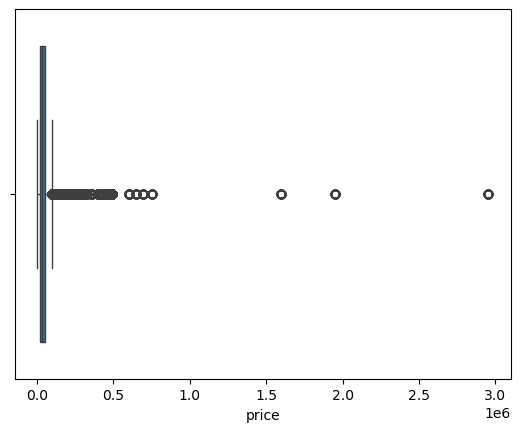

In [7]:
sns.boxplot(df_train, x='price')

In [8]:
# Apply Log_Transform to the Price column
df_train.price = np.log1p(df_train.price)

<Axes: xlabel='price'>

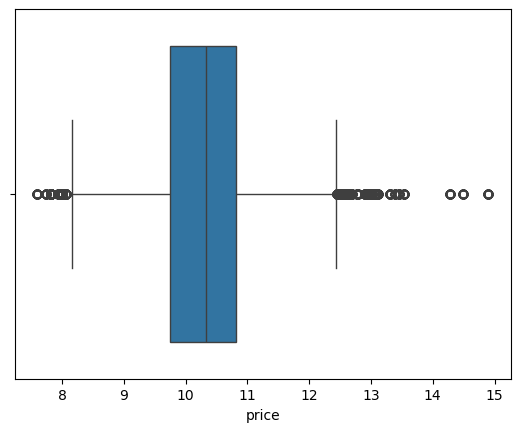

In [9]:
sns.boxplot(df_train, x='price')

<Axes: xlabel='price', ylabel='Count'>

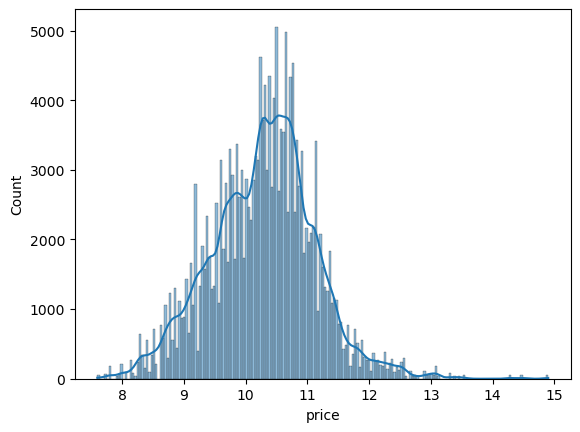

In [10]:
sns.histplot(df_train, x='price', kde=True)

<Axes: xlabel='model_year', ylabel='Count'>

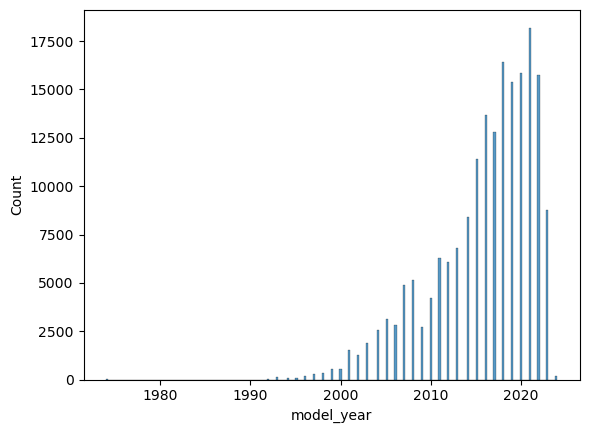

In [11]:
sns.histplot(df_train, x='model_year')

<Axes: xlabel='model_year'>

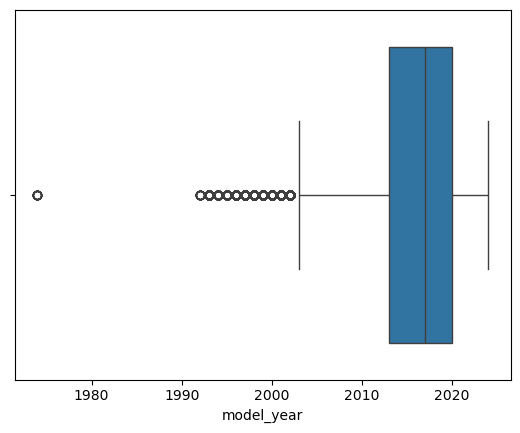

In [12]:
sns.boxplot(df_train, x='model_year')

In [13]:
# Create a New Feature "car_age"
df_train['car_age'] = 2025 - df_train['model_year']
df_test['car_age'] = 2025 - df_test['model_year']

<Axes: xlabel='car_age'>

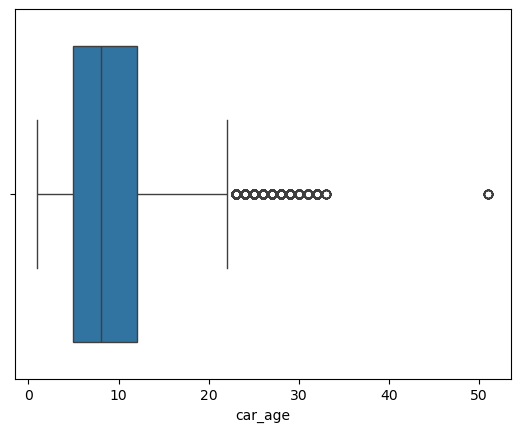

In [15]:
sns.boxplot(df_train, x='car_age')

<Axes: xlabel='car_age', ylabel='Count'>

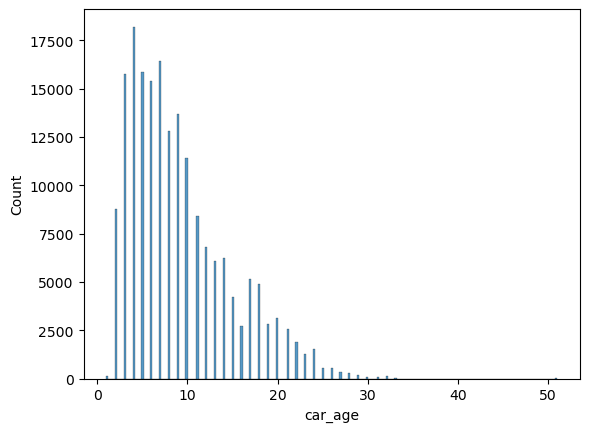

In [16]:
sns.histplot(df_train, x='car_age')

<Axes: xlabel='milage', ylabel='Count'>

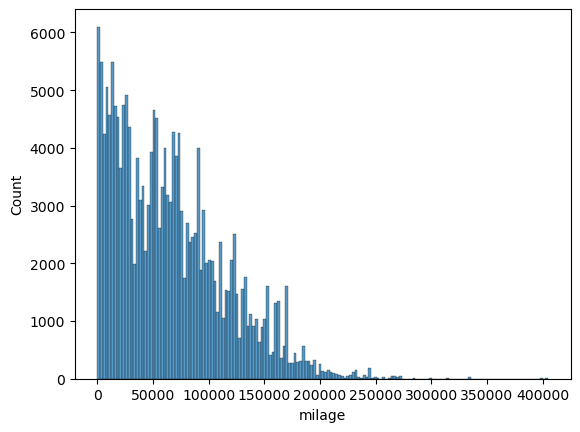

In [17]:
sns.histplot(df_train, x='milage')

<Axes: xlabel='milage'>

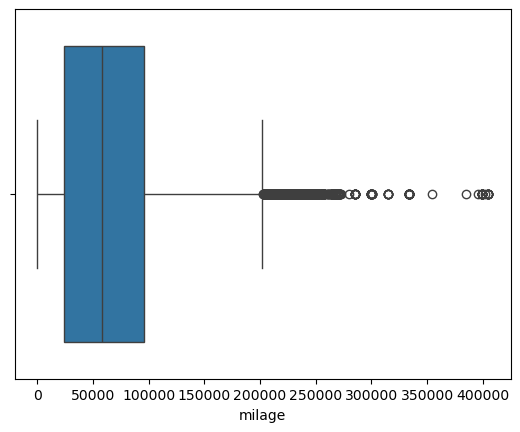

In [18]:
sns.boxplot(df_train, x='milage')

<Axes: xlabel='price', ylabel='Count'>

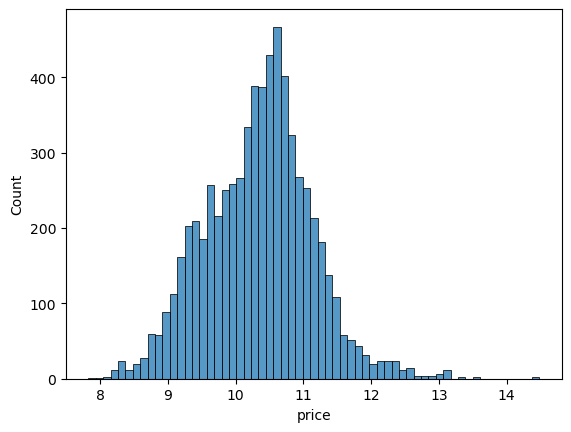

In [19]:
sns.histplot(df_train.groupby('milage')['price'].mean())

In [4]:
# Apply lowercase to all the categorical features of the dataset
df_train = df_train.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df_test = df_test.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [7]:
# Fill the missing values with the mode in the accident column
df_train.accident = df_train.accident.fillna('none reported')
df_test.accident = df_test.accident.fillna('none reported')

In [22]:
# Fill the missing values with the mode in the clean_title column
df_train.clean_title = df_train.clean_title.fillna('none reported')
df_test.clean_title = df_test.clean_title.fillna('none reported')

In [9]:
# Adjust the values in the int_col column 
import re

def normalize_color(val):
    if pd.isna(val) or val.strip() in ["–", "-", ""]:
        return "unknown"
    val = val.lower().strip()
    val = re.sub(r'[^a-z\s/]', '', val)
    val = re.sub(r'\s+', ' ', val)
    return val

In [10]:
color_map = {
    # Black family
    "blk": "black", "nero": "black", "nero ade": "black",
    "carbon black": "black", "jet black": "black", "satin black": "black",
    "amg black": "black", "global black": "black", "obsidian black": "black",
    
    # Gray family
    "charcoal": "gray", "anthracite": "gray", "slate": "gray",
    "dark gray": "gray", "light gray": "gray", "graphite": "gray",
    "ash": "gray", "rock gray": "gray", "medium ash gray": "gray",
    
    # White family
    "white": "white", "grace white": "white", "pearl beige": "white",
    "ivory": "white", "linen": "white",
    
    # Red family
    "magma red": "red", "classic red": "red", "rioja red": "red",
    "adrenaline red": "red", "hotspur": "red", "hotspur hide": "red",
    "red/black": "red", "pimento": "red",
    
    # Blue family
    "blue": "blue", "cobalt blue": "blue", "charles blue": "blue",
    "rhapsody blue": "blue", "navy pier": "blue",
    
    # Brown family
    "brown": "brown", "espresso": "brown", "mocha": "brown",
    "walnut": "brown", "cappuccino": "brown", "brandy": "brown",
    "saddle brown": "brown", "chestnut": "brown", "deep chestnut": "brown",
    
    # Beige family
    "beige": "beige", "camel": "beige", "tan": "beige", 
    "almond beige": "beige", "macchiato": "beige",
    
    # Green family
    "green": "green", "agave green": "green", "deep cypress": "green",
    
    # Orange family
    "orange": "orange", "sakhir orange": "orange", "kyalami orange": "orange",
    
    # Yellow family
    "yellow": "yellow", "giallo taurus": "yellow",
    
    # Other
    "gold": "gold", "silver": "silver", "platinum": "silver",
}

In [11]:
def standardize_color(val):
    val = normalize_color(val)
    if val == "unknown":
        return val
    # split multi-colors
    parts = [color_map.get(p.strip(), p.strip()) for p in val.split("/")]
    parts = sorted(set(parts))  # remove duplicates & sort
    return "/".join(parts)

df_train["int_col_clean"] = df_train["int_col"].apply(standardize_color)
df_test["int_col_clean"] = df_test["int_col"].apply(standardize_color)

In [12]:
# Adjust the values in the ext_col column 
def normalize_ext(val):
    if pd.isna(val) or val.strip() in ["–", "-", "", "c / c"]:
        return "unknown"
    val = val.lower().strip()
    # remove paint finish descriptors
    val = re.sub(r'\b(metallic|pearl|clearcoat|mica|tri[- ]?coat|effect|finish|matte|bright|chromaflair|premium|designo|manufaktur|prl|tinted)\b', '', val)
    val = re.sub(r'[^a-z\s]', ' ', val)  # keep only letters/spaces
    val = re.sub(r'\s+', ' ', val)       # normalize spaces
    return val.strip()

In [13]:
def map_base_color(val):
    if val == "unknown":
        return "unknown"
    
    color_keywords = {
        "black": ["black", "nero", "onyx", "obsidian", "raven", "sapphire", "noir", "ebony", "vik", "beluga"],
        "white": ["white", "bianco", "alpine", "ivory", "chalk", "balloon"],
        "gray": ["gray", "grey", "graphite", "granite", "slate", "charcoal", "magnetite", "pewter", "quartzite", "stone"],
        "silver": ["silver", "platinum", "titanium", "iridium", "satin", "liquid", "radiance", "sparkling", "mist"],
        "red": ["red", "rosso", "ruby", "crimson", "garnet", "flame", "scarlet", "sangria", "maroon", "infrared", "matador"],
        "blue": ["blue", "navarra", "aqua", "caspian", "pacific", "nautical", "midnight", "gentian", "twilight", "stormy", "lapis", "blu", "man", "sapphire"],
        "green": ["green", "verde", "cypress", "emerald", "python", "jade", "moss"],
        "brown": ["brown", "bronze", "mocha", "walnut", "brandy", "cocoa", "chestnut", "coffee", "mahogany", "auburn"],
        "beige": ["beige", "sand", "camel", "tan", "dune", "almond", "ivory"],
        "yellow": ["yellow", "golden", "silician", "hellayella"],
        "orange": ["orange", "mango", "volcanic", "arancio", "cayenne", "tango"],
        "purple": ["purple", "plum", "majestic", "ametrin"],
        "pink": ["pink"],
        "gold": ["gold"],
        "custom": ["custom", "tempest", "designo", "aurora", "sunset", "magno", "kinetic", "lava", "volcano", "gecko", "python green", "lizard"]
    }
    
    for base, keywords in color_keywords.items():
        if any(k in val for k in keywords):
            return base
    
    return "custom"

In [14]:
df_train["ext_col_clean"] = df_train["ext_col"].apply(lambda x: map_base_color(normalize_ext(x)))
df_test["ext_col_clean"] = df_test["ext_col"].apply(lambda x: map_base_color(normalize_ext(x)))

In [15]:
# Fill the missing values in the fuel_type column from the engine feature
fuel_keywords = {
    "gasoline": "gasoline",
    "diesel": "diesel",
    "electric": "electric",
    "hybrid": "hybrid",
    "plug-in-hybrid": "plug-in-hybrid",
    "e85": "e85 flex fuel",
    "flex fuel": "e85 flex fuel",
    "not supported": "not supported",
    "-": "-"
}

def extract_fuel(engine_text):
    if pd.isna(engine_text):
        return np.nan
    text = str(engine_text).lower()
    for keyword, fuel in fuel_keywords.items():
        if keyword in text:
            return fuel
    return np.nan

def fix_fuel_type(row):
    if pd.isna(row["fuel_type"]) or row["fuel_type"] == "-":
        if row["engine"] == "-":
            return "-"
        extracted = extract_fuel(row["engine"])
        return extracted if extracted is not None else row["fuel_type"]
    return row["fuel_type"]


df_train['fuel_type'] = df_train.apply(fix_fuel_type, axis=1)
df_test['fuel_type'] = df_test.apply(fix_fuel_type, axis=1)

In [16]:
def special_engine_fuel(engine_text):
    if pd.isna(engine_text):
        return np.nan

    text = str(engine_text).lower().strip()

    if 'battery'in text or "ah" in text:
        return "electric"

    return "gasoline"

df_train.loc[df_train["fuel_type"].isna(), "fuel_type"] = df_train.loc[df_train["fuel_type"].isna(), "engine"].apply(special_engine_fuel)
df_test.loc[df_test["fuel_type"].isna(), "fuel_type"] = df_test.loc[df_test["fuel_type"].isna(), "engine"].apply(special_engine_fuel)

## ENCODING CATEGORICAL FEATURES

In [91]:
from sklearn.preprocessing import LabelEncoder

def encode_cat_cols_label_enc(df_train, df_test):
  encoded_train = df_train.copy()
  encoded_test = df_test.copy()

  cat_cols = ['brand', 'fuel_type', 'transmission', 'accident', 'clean_title', 'ext_col_clean']

  enc = LabelEncoder()

  for col in cat_cols:
    encoded_train[col] = enc.fit_transform(encoded_train[col])
    encoded_test[col] = enc.transform(encoded_test[col])

  # Engine
  full_data_column = pd.concat([encoded_train.engine, encoded_test.engine], axis=0)
  full_data_column = enc.fit_transform(full_data_column)
  encoded_train.engine = enc.transform(encoded_train.engine)
  encoded_test.engine = enc.transform(encoded_test.engine)

  # Model
  full_data_column = pd.concat([encoded_train.model, encoded_test.model], axis=0)
  full_data_column = enc.fit_transform(full_data_column)
  encoded_train.model = enc.transform(encoded_train.model)
  encoded_test.model = enc.transform(encoded_test.model)

  # Transmission
  full_data_column = pd.concat([encoded_train.transmission, encoded_test.transmission], axis=0)
  full_data_column = enc.fit_transform(full_data_column)
  encoded_train.transmission = enc.transform(encoded_train.transmission)
  encoded_test.transmission = enc.transform(encoded_test.transmission)

  # External COlour
  full_data_column = pd.concat([encoded_train.ext_col_clean, encoded_test.ext_col_clean], axis=0)
  full_data_column = enc.fit_transform(full_data_column)
  encoded_train.ext_col_clean = enc.transform(encoded_train.ext_col_clean)
  encoded_test.ext_col_clean = enc.transform(encoded_test.ext_col_clean)

  # Internal COlour
  full_data_column = pd.concat([encoded_train.int_col_clean, encoded_test.int_col_clean], axis=0)
  full_data_column = enc.fit_transform(full_data_column)
  encoded_train.int_col_clean = enc.transform(encoded_train.int_col_clean)
  encoded_test.int_col_clean = enc.transform(encoded_test.int_col_clean)

  return encoded_train, encoded_test

In [92]:
encoded_train, encoded_test = encode_cat_cols_label_enc(df_train, df_test)

## Training the Models

In [93]:
X = encoded_train.drop(['price', 'id','ext_col', 'int_col'], axis=1)
y = np.expm1(encoded_train['price'])

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
from sklearn.metrics import mean_squared_error

def rmse(y_val, y_pred):
  return np.sqrt(mean_squared_error(y_val, y_pred))

def predict(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    y_val_expm = np.expm1(y_val)
    y_pred_expm = np.expm1(y_pred)
    
    print('RMSE:', rmse(y_val_expm, y_pred_expm))

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
import catboost as cat

In [79]:
predict(LinearRegression())

RMSE: 70365.52338445975


In [31]:
predict(RandomForestRegressor(random_state=10))

RMSE: 0.5106428678839114


In [80]:
predict(xgb.XGBRegressor())

RMSE: 68571.28733506096


In [81]:
predict(lgb.LGBMRegressor())

RMSE: 68812.41772052948


In [82]:
predict(cat.CatBoostRegressor(verbose=0))

RMSE: 68655.76449425616


In [71]:
cat_model = cat.CatBoostRegressor(verbose=0)
cat_model.fit(X, y)

In [56]:
test = encoded_test.drop(['id','ext_col', 'int_col'], axis=1)

In [72]:
test_pred_cat = cat_model.predict(test)

In [52]:
sample_sub.price = test_pred

sample_sub.to_csv('1st_submission.csv', index=False)

In [73]:
lgb_model = lgb.LGBMRegressor(verbose=0)
lgb_model.fit(X, y)
test_pred = lgb_model.predict(test)

In [75]:
submission = pd.DataFrame({
    'id': encoded_test.id,
    'price': blend_preds
})

submission.to_csv('2nd_submission.csv', index=False)

In [97]:
# Hyperparameter Tuning for Catboost Model
import optuna
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def objective_cat(trial):
    params = {
        "loss_function": "RMSE",
        "iterations": 10000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-3, 10.0, log=True),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 10.0),
        "random_strength": trial.suggest_float("random_strength", 0.0, 10.0),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "verbose": 0,
        "early_stopping_rounds": 100,
    }

    # Train/Val split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    model = CatBoostRegressor(**params)
    model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=0)

    preds = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, preds))  # RMSE in original space
    return rmse

# Run Optuna
study_cat = optuna.create_study(direction="minimize")
study_cat.optimize(objective_cat, n_trials=50)
print("Best CatBoost params:", study_cat.best_trial.params)
print("Best CatBoost RMSE:", study_cat.best_value)

[I 2025-09-13 01:09:00,872] A new study created in memory with name: no-name-db40c236-8271-4435-9b17-b9c5d8b1ae7a
[I 2025-09-13 01:09:10,196] Trial 0 finished with value: 68070.75959194952 and parameters: {'learning_rate': 0.04707841055578052, 'depth': 8, 'l2_leaf_reg': 8.38925873815768, 'bagging_temperature': 8.069365172069734, 'random_strength': 6.590240955690545, 'border_count': 204}. Best is trial 0 with value: 68070.75959194952.
[I 2025-09-13 01:09:26,812] Trial 1 finished with value: 68191.86433902063 and parameters: {'learning_rate': 0.01177795709225934, 'depth': 5, 'l2_leaf_reg': 0.0011730888046148898, 'bagging_temperature': 9.389788345251258, 'random_strength': 4.191856199575616, 'border_count': 32}. Best is trial 0 with value: 68070.75959194952.
[I 2025-09-13 01:10:30,008] Trial 2 finished with value: 67980.46204946085 and parameters: {'learning_rate': 0.005174543172495284, 'depth': 7, 'l2_leaf_reg': 1.9352329988907324, 'bagging_temperature': 1.368781246966756, 'random_streng

Best CatBoost params: {'learning_rate': 0.014408106191708634, 'depth': 7, 'l2_leaf_reg': 0.0027483130731321987, 'bagging_temperature': 3.379120060504191, 'random_strength': 8.936584249767625, 'border_count': 211}
Best CatBoost RMSE: 67702.48118583107


In [99]:
# Hyperparameter Tuning for Lightgbm model
def objective_lgb(trial):
    params = {
        "objective": "regression",
        "metric": "rmse",
        "boosting_type": "gbdt",
        "verbosity": -1,
        "n_estimators": 10000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 20, 3000),
        "max_depth": trial.suggest_int("max_depth", 3, 16),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True),
    }

    # Train/Val split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    model = lgb.LGBMRegressor(**params)
    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric="rmse",
        callbacks=[lgb.early_stopping(100), lgb.log_evaluation(-1)]
    )

    preds = model.predict(X_val, num_iteration=model.best_iteration_)
    rmse = np.sqrt(mean_squared_error(y_val, preds))  # RMSE in original space
    return rmse

# Run Optuna
study_lgb = optuna.create_study(direction="minimize")
study_lgb.optimize(objective_lgb, n_trials=50)
print("Best LightGBM params:", study_lgb.best_trial.params)
print("Best LightGBM RMSE:", study_lgb.best_value)

[I 2025-09-13 01:57:33,034] A new study created in memory with name: no-name-5e3034a2-9b57-4593-9569-9cad5b74e7da


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[394]	valid_0's rmse: 67996.8


[I 2025-09-13 01:57:50,738] Trial 0 finished with value: 67996.81980071591 and parameters: {'learning_rate': 0.009382148825346564, 'num_leaves': 1555, 'max_depth': 15, 'min_child_samples': 65, 'subsample': 0.960432342011022, 'colsample_bytree': 0.6531117226304464, 'reg_alpha': 0.004228809113470643, 'reg_lambda': 0.004323083794624754}. Best is trial 0 with value: 67996.81980071591.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[512]	valid_0's rmse: 67975.5


[I 2025-09-13 01:58:05,489] Trial 1 finished with value: 67975.53429034483 and parameters: {'learning_rate': 0.009045508314131227, 'num_leaves': 2749, 'max_depth': 13, 'min_child_samples': 93, 'subsample': 0.8202827476560348, 'colsample_bytree': 0.7609071935638967, 'reg_alpha': 4.547024798161937e-07, 'reg_lambda': 5.099447908664336e-08}. Best is trial 1 with value: 67975.53429034483.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[8253]	valid_0's rmse: 67777.6


[I 2025-09-13 01:58:53,778] Trial 2 finished with value: 67777.64769769466 and parameters: {'learning_rate': 0.0014235706004543309, 'num_leaves': 389, 'max_depth': 6, 'min_child_samples': 60, 'subsample': 0.6424391472902236, 'colsample_bytree': 0.5923385790948519, 'reg_alpha': 4.554820060510287e-08, 'reg_lambda': 1.5078529895299917}. Best is trial 2 with value: 67777.64769769466.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[863]	valid_0's rmse: 68080.8


[I 2025-09-13 01:59:14,502] Trial 3 finished with value: 68080.83650023676 and parameters: {'learning_rate': 0.006554903022299295, 'num_leaves': 1842, 'max_depth': 13, 'min_child_samples': 99, 'subsample': 0.6169078810251392, 'colsample_bytree': 0.9854066527312543, 'reg_alpha': 0.0014280731852082107, 'reg_lambda': 0.00978990870351176}. Best is trial 2 with value: 67777.64769769466.


Training until validation scores don't improve for 100 rounds


[I 2025-09-13 01:59:17,260] Trial 4 finished with value: 68788.17294596216 and parameters: {'learning_rate': 0.17108069494623737, 'num_leaves': 2899, 'max_depth': 15, 'min_child_samples': 25, 'subsample': 0.8589597787848071, 'colsample_bytree': 0.9616312937825864, 'reg_alpha': 0.008165996581764624, 'reg_lambda': 4.8475015355914057e-08}. Best is trial 2 with value: 67777.64769769466.


Early stopping, best iteration is:
[10]	valid_0's rmse: 68788.2
Training until validation scores don't improve for 100 rounds


[I 2025-09-13 01:59:21,133] Trial 5 finished with value: 68363.23111187018 and parameters: {'learning_rate': 0.08780088050839861, 'num_leaves': 2883, 'max_depth': 15, 'min_child_samples': 33, 'subsample': 0.8364257079500146, 'colsample_bytree': 0.8515931766636178, 'reg_alpha': 0.014230020576834122, 'reg_lambda': 0.059077165009478586}. Best is trial 2 with value: 67777.64769769466.


Early stopping, best iteration is:
[26]	valid_0's rmse: 68363.2
Training until validation scores don't improve for 100 rounds


[I 2025-09-13 01:59:21,844] Trial 6 finished with value: 68035.27873900371 and parameters: {'learning_rate': 0.28655881121402105, 'num_leaves': 1132, 'max_depth': 6, 'min_child_samples': 25, 'subsample': 0.823632503798897, 'colsample_bytree': 0.8373801414591314, 'reg_alpha': 0.02371503425305165, 'reg_lambda': 3.132221633646226e-07}. Best is trial 2 with value: 67777.64769769466.


Early stopping, best iteration is:
[25]	valid_0's rmse: 68035.3
Training until validation scores don't improve for 100 rounds


[I 2025-09-13 01:59:22,759] Trial 7 finished with value: 68142.47082242488 and parameters: {'learning_rate': 0.09276751217226585, 'num_leaves': 2485, 'max_depth': 4, 'min_child_samples': 5, 'subsample': 0.5752655788481372, 'colsample_bytree': 0.9233689826971561, 'reg_alpha': 0.059935711195001413, 'reg_lambda': 0.017757447312994966}. Best is trial 2 with value: 67777.64769769466.


Early stopping, best iteration is:
[118]	valid_0's rmse: 68142.5
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[375]	valid_0's rmse: 67844


[I 2025-09-13 01:59:26,690] Trial 8 finished with value: 67843.96403862652 and parameters: {'learning_rate': 0.021529723016525722, 'num_leaves': 2998, 'max_depth': 8, 'min_child_samples': 43, 'subsample': 0.6099918943931106, 'colsample_bytree': 0.5987722396234839, 'reg_alpha': 7.526934645799706e-06, 'reg_lambda': 0.08586765446368193}. Best is trial 2 with value: 67777.64769769466.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[687]	valid_0's rmse: 67833.5


[I 2025-09-13 01:59:29,785] Trial 9 finished with value: 67833.4728487461 and parameters: {'learning_rate': 0.03560617361823676, 'num_leaves': 692, 'max_depth': 5, 'min_child_samples': 48, 'subsample': 0.5883877340168584, 'colsample_bytree': 0.5643541780648418, 'reg_alpha': 0.7054751003939054, 'reg_lambda': 0.4648861342884726}. Best is trial 2 with value: 67777.64769769466.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[5182]	valid_0's rmse: 67801.9


[I 2025-09-13 02:00:36,392] Trial 10 finished with value: 67801.86739182142 and parameters: {'learning_rate': 0.0010471484214686685, 'num_leaves': 233, 'max_depth': 9, 'min_child_samples': 71, 'subsample': 0.7119184179521882, 'colsample_bytree': 0.5043196500834208, 'reg_alpha': 2.419923991927423e-08, 'reg_lambda': 4.098748063344611}. Best is trial 2 with value: 67777.64769769466.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[6492]	valid_0's rmse: 67796.4


[I 2025-09-13 02:01:38,596] Trial 11 finished with value: 67796.44848262655 and parameters: {'learning_rate': 0.0010188811118087126, 'num_leaves': 123, 'max_depth': 9, 'min_child_samples': 72, 'subsample': 0.7092174370765126, 'colsample_bytree': 0.5238805578743219, 'reg_alpha': 1.3474772094168603e-08, 'reg_lambda': 6.589338293437556}. Best is trial 2 with value: 67777.64769769466.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[8288]	valid_0's rmse: 67812.7


[I 2025-09-13 02:02:36,821] Trial 12 finished with value: 67812.67847580828 and parameters: {'learning_rate': 0.0010999992386704135, 'num_leaves': 66, 'max_depth': 7, 'min_child_samples': 74, 'subsample': 0.6944645113342781, 'colsample_bytree': 0.6663696835903887, 'reg_alpha': 1.3729775156933269e-08, 'reg_lambda': 2.9894501498545228e-05}. Best is trial 2 with value: 67777.64769769466.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1766]	valid_0's rmse: 67833.5


[I 2025-09-13 02:03:08,113] Trial 13 finished with value: 67833.51053150432 and parameters: {'learning_rate': 0.003090770115849854, 'num_leaves': 563, 'max_depth': 11, 'min_child_samples': 85, 'subsample': 0.673843382286332, 'colsample_bytree': 0.5195398140474129, 'reg_alpha': 2.5491558962144745e-05, 'reg_lambda': 6.0395788980055665}. Best is trial 2 with value: 67777.64769769466.


Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[9997]	valid_0's rmse: 67958.3


[I 2025-09-13 02:03:39,555] Trial 14 finished with value: 67958.29141889098 and parameters: {'learning_rate': 0.002609356354293887, 'num_leaves': 913, 'max_depth': 3, 'min_child_samples': 60, 'subsample': 0.7568482990101193, 'colsample_bytree': 0.6743521331463558, 'reg_alpha': 1.7696675763930814e-07, 'reg_lambda': 5.2392582155185666e-05}. Best is trial 2 with value: 67777.64769769466.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1606]	valid_0's rmse: 67854.3


[I 2025-09-13 02:04:11,459] Trial 15 finished with value: 67854.29722177614 and parameters: {'learning_rate': 0.002687647197067137, 'num_leaves': 549, 'max_depth': 11, 'min_child_samples': 78, 'subsample': 0.5156096507364379, 'colsample_bytree': 0.5956730363430327, 'reg_alpha': 2.7224372532122397e-06, 'reg_lambda': 0.9186200160137248}. Best is trial 2 with value: 67777.64769769466.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2215]	valid_0's rmse: 67947.6


[I 2025-09-13 02:04:55,394] Trial 16 finished with value: 67947.57917175068 and parameters: {'learning_rate': 0.0017286000778893745, 'num_leaves': 1267, 'max_depth': 10, 'min_child_samples': 54, 'subsample': 0.7554830523291195, 'colsample_bytree': 0.747535632449426, 'reg_alpha': 0.0001226976461057141, 'reg_lambda': 0.0006042312869375772}. Best is trial 2 with value: 67777.64769769466.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2206]	valid_0's rmse: 67777.5


[I 2025-09-13 02:05:08,948] Trial 17 finished with value: 67777.4596808933 and parameters: {'learning_rate': 0.005465501102315404, 'num_leaves': 280, 'max_depth': 7, 'min_child_samples': 81, 'subsample': 0.6511283405296285, 'colsample_bytree': 0.5565407972683526, 'reg_alpha': 3.3120658711843455e-07, 'reg_lambda': 0.6835872613441085}. Best is trial 17 with value: 67777.4596808933.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1857]	valid_0's rmse: 67859.5


[I 2025-09-13 02:05:20,873] Trial 18 finished with value: 67859.51235871765 and parameters: {'learning_rate': 0.005481630126981985, 'num_leaves': 1877, 'max_depth': 6, 'min_child_samples': 86, 'subsample': 0.5032544767252884, 'colsample_bytree': 0.7466601786060684, 'reg_alpha': 4.2540330579498945e-07, 'reg_lambda': 0.0007288009164130619}. Best is trial 17 with value: 67777.4596808933.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[637]	valid_0's rmse: 67807.3


[I 2025-09-13 02:05:25,108] Trial 19 finished with value: 67807.29443356759 and parameters: {'learning_rate': 0.01959393498944701, 'num_leaves': 392, 'max_depth': 7, 'min_child_samples': 60, 'subsample': 0.6392393706488129, 'colsample_bytree': 0.6198425736972756, 'reg_alpha': 0.000152746157741609, 'reg_lambda': 0.3583158999771826}. Best is trial 17 with value: 67777.4596808933.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[9804]	valid_0's rmse: 67886


[I 2025-09-13 02:05:57,423] Trial 20 finished with value: 67885.99870722063 and parameters: {'learning_rate': 0.004223089253612323, 'num_leaves': 881, 'max_depth': 3, 'min_child_samples': 82, 'subsample': 0.5644744784076201, 'colsample_bytree': 0.7049050779823982, 'reg_alpha': 1.4321705837460654e-07, 'reg_lambda': 7.8942335153402e-06}. Best is trial 17 with value: 67777.4596808933.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[6267]	valid_0's rmse: 67801.6


[I 2025-09-13 02:06:31,501] Trial 21 finished with value: 67801.60832101188 and parameters: {'learning_rate': 0.001781116515202551, 'num_leaves': 30, 'max_depth': 8, 'min_child_samples': 69, 'subsample': 0.6599527658783612, 'colsample_bytree': 0.5467941278375502, 'reg_alpha': 1.2784706069540969e-08, 'reg_lambda': 6.603619006114668}. Best is trial 17 with value: 67777.4596808933.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[3361]	valid_0's rmse: 67851.4


[I 2025-09-13 02:07:16,123] Trial 22 finished with value: 67851.3673961406 and parameters: {'learning_rate': 0.001556301233861315, 'num_leaves': 345, 'max_depth': 9, 'min_child_samples': 91, 'subsample': 0.72543617146831, 'colsample_bytree': 0.5653883683251516, 'reg_alpha': 1.8707582313344996e-06, 'reg_lambda': 1.0754241058270595}. Best is trial 17 with value: 67777.4596808933.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[5196]	valid_0's rmse: 67783.4


[I 2025-09-13 02:07:38,834] Trial 23 finished with value: 67783.44392766929 and parameters: {'learning_rate': 0.0037298642466323333, 'num_leaves': 256, 'max_depth': 5, 'min_child_samples': 55, 'subsample': 0.7803900031605767, 'colsample_bytree': 0.500270021626363, 'reg_alpha': 5.6904174427003954e-08, 'reg_lambda': 0.11846279829035043}. Best is trial 17 with value: 67777.4596808933.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1854]	valid_0's rmse: 67793.4


[I 2025-09-13 02:07:46,733] Trial 24 finished with value: 67793.36042908448 and parameters: {'learning_rate': 0.011949785846592635, 'num_leaves': 794, 'max_depth': 5, 'min_child_samples': 39, 'subsample': 0.9046091513595123, 'colsample_bytree': 0.6195068910183252, 'reg_alpha': 7.928577670560459e-08, 'reg_lambda': 0.08900580367859393}. Best is trial 17 with value: 67777.4596808933.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[3821]	valid_0's rmse: 67807.8


[I 2025-09-13 02:08:05,912] Trial 25 finished with value: 67807.84231077187 and parameters: {'learning_rate': 0.0037839324081547707, 'num_leaves': 424, 'max_depth': 5, 'min_child_samples': 56, 'subsample': 0.7841366920637799, 'colsample_bytree': 0.5648229152571571, 'reg_alpha': 1.61389571721808e-05, 'reg_lambda': 0.002561105247054387}. Best is trial 17 with value: 67777.4596808933.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1515]	valid_0's rmse: 67752


[I 2025-09-13 02:08:17,538] Trial 26 finished with value: 67752.03514734756 and parameters: {'learning_rate': 0.00582436716681728, 'num_leaves': 1115, 'max_depth': 7, 'min_child_samples': 50, 'subsample': 0.6510217820249602, 'colsample_bytree': 0.5086190727560862, 'reg_alpha': 1.9893995809723266e-06, 'reg_lambda': 0.15497469679452436}. Best is trial 26 with value: 67752.03514734756.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[306]	valid_0's rmse: 67822


[I 2025-09-13 02:08:20,216] Trial 27 finished with value: 67822.01192676088 and parameters: {'learning_rate': 0.033214877502230775, 'num_leaves': 1165, 'max_depth': 7, 'min_child_samples': 45, 'subsample': 0.5482508381374227, 'colsample_bytree': 0.5953093010150066, 'reg_alpha': 1.0627089205121629e-06, 'reg_lambda': 1.4249958409317833}. Best is trial 26 with value: 67752.03514734756.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1237]	valid_0's rmse: 67721.5


[I 2025-09-13 02:08:32,266] Trial 28 finished with value: 67721.5369686429 and parameters: {'learning_rate': 0.006470466010076438, 'num_leaves': 1578, 'max_depth': 8, 'min_child_samples': 33, 'subsample': 0.6430116584363125, 'colsample_bytree': 0.5413265326286524, 'reg_alpha': 6.028687694358063e-06, 'reg_lambda': 0.014874193187779399}. Best is trial 28 with value: 67721.5369686429.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[569]	valid_0's rmse: 68045.3


[I 2025-09-13 02:08:39,284] Trial 29 finished with value: 68045.33063478737 and parameters: {'learning_rate': 0.01053026003017416, 'num_leaves': 1650, 'max_depth': 8, 'min_child_samples': 7, 'subsample': 0.9776153840718049, 'colsample_bytree': 0.6373556489406204, 'reg_alpha': 0.0008801800962198123, 'reg_lambda': 0.004496866152472956}. Best is trial 28 with value: 67721.5369686429.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[631]	valid_0's rmse: 67866.5


[I 2025-09-13 02:08:56,521] Trial 30 finished with value: 67866.49982722984 and parameters: {'learning_rate': 0.006201439859884042, 'num_leaves': 1505, 'max_depth': 11, 'min_child_samples': 30, 'subsample': 0.6771074020316539, 'colsample_bytree': 0.542466781083022, 'reg_alpha': 5.6649905784689826e-05, 'reg_lambda': 0.019420095484711273}. Best is trial 28 with value: 67721.5369686429.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[669]	valid_0's rmse: 67811.4


[I 2025-09-13 02:09:01,049] Trial 31 finished with value: 67811.42504467812 and parameters: {'learning_rate': 0.014185455247896295, 'num_leaves': 2058, 'max_depth': 6, 'min_child_samples': 14, 'subsample': 0.6351254869226063, 'colsample_bytree': 0.5675823190236037, 'reg_alpha': 4.587552070884311e-06, 'reg_lambda': 0.23503073844778793}. Best is trial 28 with value: 67721.5369686429.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1357]	valid_0's rmse: 67798.1


[I 2025-09-13 02:09:10,407] Trial 32 finished with value: 67798.10858381858 and parameters: {'learning_rate': 0.0076924026348737014, 'num_leaves': 1428, 'max_depth': 7, 'min_child_samples': 66, 'subsample': 0.6419867054201401, 'colsample_bytree': 0.7040498346308726, 'reg_alpha': 4.891408686970649e-07, 'reg_lambda': 0.020827992240012447}. Best is trial 28 with value: 67721.5369686429.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1068]	valid_0's rmse: 67804.6


[I 2025-09-13 02:09:29,289] Trial 33 finished with value: 67804.55979766614 and parameters: {'learning_rate': 0.004987337460861705, 'num_leaves': 2362, 'max_depth': 10, 'min_child_samples': 37, 'subsample': 0.6066180411653985, 'colsample_bytree': 0.5320920251895132, 'reg_alpha': 5.925831503267528e-07, 'reg_lambda': 1.3793695113565754}. Best is trial 28 with value: 67721.5369686429.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1214]	valid_0's rmse: 67812.1


[I 2025-09-13 02:09:40,048] Trial 34 finished with value: 67812.13084675196 and parameters: {'learning_rate': 0.00842686340348263, 'num_leaves': 1016, 'max_depth': 8, 'min_child_samples': 99, 'subsample': 0.5466670847308682, 'colsample_bytree': 0.5844083796708854, 'reg_alpha': 8.167909743716854e-06, 'reg_lambda': 0.0045386937816304}. Best is trial 28 with value: 67721.5369686429.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1515]	valid_0's rmse: 67934.9


[I 2025-09-13 02:10:56,184] Trial 35 finished with value: 67934.92772679686 and parameters: {'learning_rate': 0.0022615247525579097, 'num_leaves': 1744, 'max_depth': 13, 'min_child_samples': 48, 'subsample': 0.658093238948671, 'colsample_bytree': 0.6387659773187586, 'reg_alpha': 2.2708765945862677e-07, 'reg_lambda': 0.24635992408050705}. Best is trial 28 with value: 67721.5369686429.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[435]	valid_0's rmse: 67881.1


[I 2025-09-13 02:10:59,116] Trial 36 finished with value: 67881.13288743614 and parameters: {'learning_rate': 0.025079798174184872, 'num_leaves': 1317, 'max_depth': 6, 'min_child_samples': 23, 'subsample': 0.6212673310896641, 'colsample_bytree': 0.8168308612499837, 'reg_alpha': 1.4454232055100108e-06, 'reg_lambda': 0.028214997901150562}. Best is trial 28 with value: 67721.5369686429.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[2945]	valid_0's rmse: 67844.2


[I 2025-09-13 02:11:12,160] Trial 37 finished with value: 67844.15820554641 and parameters: {'learning_rate': 0.008246202434846549, 'num_leaves': 2139, 'max_depth': 4, 'min_child_samples': 63, 'subsample': 0.6875738678862264, 'colsample_bytree': 0.5436613447292258, 'reg_alpha': 0.0005257095059776049, 'reg_lambda': 2.0283516822270395}. Best is trial 28 with value: 67721.5369686429.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1272]	valid_0's rmse: 67924.2


[I 2025-09-13 02:11:17,110] Trial 38 finished with value: 67924.19946191892 and parameters: {'learning_rate': 0.015817843302255937, 'num_leaves': 648, 'max_depth': 4, 'min_child_samples': 19, 'subsample': 0.7316928486761314, 'colsample_bytree': 0.6959124843124336, 'reg_alpha': 0.0026566364219261216, 'reg_lambda': 0.05502701563790261}. Best is trial 28 with value: 67721.5369686429.


Training until validation scores don't improve for 100 rounds


[I 2025-09-13 02:11:18,695] Trial 39 finished with value: 67989.09011126522 and parameters: {'learning_rate': 0.06999141074744099, 'num_leaves': 1023, 'max_depth': 7, 'min_child_samples': 32, 'subsample': 0.6080344514069236, 'colsample_bytree': 0.9107460787476883, 'reg_alpha': 4.564086491783371e-08, 'reg_lambda': 0.00015052930711757028}. Best is trial 28 with value: 67721.5369686429.


Early stopping, best iteration is:
[115]	valid_0's rmse: 67989.1
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1854]	valid_0's rmse: 67777.5


[I 2025-09-13 02:11:30,489] Trial 40 finished with value: 67777.4580066216 and parameters: {'learning_rate': 0.004536942359357857, 'num_leaves': 1874, 'max_depth': 6, 'min_child_samples': 49, 'subsample': 0.5885298038131523, 'colsample_bytree': 0.5009538287934738, 'reg_alpha': 1.35194933466547e-05, 'reg_lambda': 4.0840936698450625e-07}. Best is trial 28 with value: 67721.5369686429.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1950]	valid_0's rmse: 67737.8


[I 2025-09-13 02:11:45,683] Trial 41 finished with value: 67737.84940862826 and parameters: {'learning_rate': 0.00605188744087984, 'num_leaves': 1890, 'max_depth': 6, 'min_child_samples': 39, 'subsample': 0.5970134231329037, 'colsample_bytree': 0.5057451000998955, 'reg_alpha': 1.5697821624990577e-05, 'reg_lambda': 3.3461789294468096e-07}. Best is trial 28 with value: 67721.5369686429.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1822]	valid_0's rmse: 67741.6


[I 2025-09-13 02:11:56,693] Trial 42 finished with value: 67741.611698144 and parameters: {'learning_rate': 0.006585517013846298, 'num_leaves': 1964, 'max_depth': 6, 'min_child_samples': 39, 'subsample': 0.5893617777246757, 'colsample_bytree': 0.5172233831780849, 'reg_alpha': 1.5848065086308638e-05, 'reg_lambda': 2.6064971020807375e-07}. Best is trial 28 with value: 67721.5369686429.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[1465]	valid_0's rmse: 67729


[I 2025-09-13 02:12:05,245] Trial 43 finished with value: 67728.96234101387 and parameters: {'learning_rate': 0.01112351825466734, 'num_leaves': 1971, 'max_depth': 6, 'min_child_samples': 39, 'subsample': 0.586747069251217, 'colsample_bytree': 0.5002553392494489, 'reg_alpha': 2.3055919521385312e-05, 'reg_lambda': 1.1040973605680885e-08}. Best is trial 28 with value: 67721.5369686429.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[566]	valid_0's rmse: 67735.5


[I 2025-09-13 02:12:11,396] Trial 44 finished with value: 67735.52479264066 and parameters: {'learning_rate': 0.01190946150805417, 'num_leaves': 2156, 'max_depth': 8, 'min_child_samples': 39, 'subsample': 0.5312042157479725, 'colsample_bytree': 0.5239689370960887, 'reg_alpha': 0.0001850632331736983, 'reg_lambda': 1.0140375991257881e-08}. Best is trial 28 with value: 67721.5369686429.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[595]	valid_0's rmse: 67748.3


[I 2025-09-13 02:12:18,370] Trial 45 finished with value: 67748.33119527376 and parameters: {'learning_rate': 0.011227206955737569, 'num_leaves': 2597, 'max_depth': 8, 'min_child_samples': 40, 'subsample': 0.5335828340675616, 'colsample_bytree': 0.5290038218601077, 'reg_alpha': 6.848141262267566e-05, 'reg_lambda': 1.530105693975209e-08}. Best is trial 28 with value: 67721.5369686429.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[365]	valid_0's rmse: 67762.5


[I 2025-09-13 02:12:24,647] Trial 46 finished with value: 67762.48327739471 and parameters: {'learning_rate': 0.013551094081032009, 'num_leaves': 2153, 'max_depth': 9, 'min_child_samples': 28, 'subsample': 0.5629263482789922, 'colsample_bytree': 0.5238588426685478, 'reg_alpha': 4.3697295044767066e-05, 'reg_lambda': 2.3467788674006498e-07}. Best is trial 28 with value: 67721.5369686429.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[786]	valid_0's rmse: 67812.2


[I 2025-09-13 02:12:28,860] Trial 47 finished with value: 67812.21063098407 and parameters: {'learning_rate': 0.027556944771298587, 'num_leaves': 2334, 'max_depth': 5, 'min_child_samples': 34, 'subsample': 0.5240689737209252, 'colsample_bytree': 0.5836922918776197, 'reg_alpha': 0.0002866022397232693, 'reg_lambda': 1.1224807382338942e-08}. Best is trial 28 with value: 67721.5369686429.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[65]	valid_0's rmse: 68029


[I 2025-09-13 02:12:33,438] Trial 48 finished with value: 68028.98198948945 and parameters: {'learning_rate': 0.04886076725088885, 'num_leaves': 2039, 'max_depth': 14, 'min_child_samples': 41, 'subsample': 0.5840481275594809, 'colsample_bytree': 0.61842396519497, 'reg_alpha': 2.9214647898406097e-05, 'reg_lambda': 1.0935666438692148e-07}. Best is trial 28 with value: 67721.5369686429.


Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[166]	valid_0's rmse: 67901.2


[I 2025-09-13 02:12:48,167] Trial 49 finished with value: 67901.18578611684 and parameters: {'learning_rate': 0.0179017747489574, 'num_leaves': 1713, 'max_depth': 16, 'min_child_samples': 36, 'subsample': 0.5946150141244596, 'colsample_bytree': 0.5221244672559726, 'reg_alpha': 4.69695504134731, 'reg_lambda': 2.1251718544122723e-06}. Best is trial 28 with value: 67721.5369686429.


Best LightGBM params: {'learning_rate': 0.006470466010076438, 'num_leaves': 1578, 'max_depth': 8, 'min_child_samples': 33, 'subsample': 0.6430116584363125, 'colsample_bytree': 0.5413265326286524, 'reg_alpha': 6.028687694358063e-06, 'reg_lambda': 0.014874193187779399}
Best LightGBM RMSE: 67721.5369686429


In [102]:
## KFold using both finetuned models
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge

# Define RMSE function
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Define KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store OOF preds
oof_lgb = np.zeros(len(X))
oof_cat = np.zeros(len(X))

test_preds_lgb = np.zeros(len(test))
test_preds_cat = np.zeros(len(test))

# --- Level 1 Models (LGB + CatBoost) ---
for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
    print(f"--- Fold {fold + 1} / {kf.get_n_splits()} ---")
    
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    # LightGBM
    model_lgb = lgb.LGBMRegressor(
        **study_lgb.best_trial.params,
        n_estimators=5000
    )
    model_lgb.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric="rmse"
    )
    preds_val_lgb = model_lgb.predict(X_val, num_iteration=model_lgb.best_iteration_)
    preds_test_lgb = model_lgb.predict(test, num_iteration=model_lgb.best_iteration_)
    
    oof_lgb[val_idx] = preds_val_lgb
    test_preds_lgb += preds_test_lgb / kf.n_splits
    
    # CatBoost
    model_cat = CatBoostRegressor(
        **study_cat.best_trial.params,
        iterations=5000,
        eval_metric="RMSE",
        early_stopping_rounds=100,
        verbose=0
    )
    model_cat.fit(X_train, y_train, eval_set=(X_val, y_val))
    
    preds_val_cat = model_cat.predict(X_val)
    preds_test_cat = model_cat.predict(test)
    
    oof_cat[val_idx] = preds_val_cat
    test_preds_cat += preds_test_cat / kf.n_splits

# --- Level 2 Model (Stacking) ---
stack_train = np.vstack([oof_lgb, oof_cat]).T
stack_test = np.vstack([test_preds_lgb, test_preds_cat]).T

meta_model = Ridge(alpha=1.0)
meta_model.fit(stack_train, y)

stack_oof = meta_model.predict(stack_train)
stack_rmse = rmse(y, stack_oof)
print(f"\nStacking Model RMSE: {stack_rmse:.4f}")

# Final predictions
final_preds = meta_model.predict(stack_test)

# Submission
submission = pd.DataFrame({
    "id": encoded_test.id,  # Replace with actual ID column name from test.csv
    "price": final_preds
})
submission.to_csv("crazy_stacking.csv", index=False)
print("submission.csv created ✅")

--- Fold 1 / 5 ---
--- Fold 2 / 5 ---
--- Fold 3 / 5 ---
--- Fold 4 / 5 ---
--- Fold 5 / 5 ---

Stacking Model RMSE: 72697.7682
submission.csv created ✅
